# K-means 
**Clustering:** Divides data into a specified number of groups.

**Assignment:** Each sample is assigned to the cluster with the nearest mean (centroid).

**Steps:**
- **Choose Initial Centroids:** Start with centroids chosen either randomly or pre-specified.
- **Iterative Process:**
    - Assign each sample to the nearest centroid.
    - Update the centroids by calculating the mean of all samples in each cluster.

**Minimize:**
- Inertia: Minimize the sum of squared distances between each sample and its centroid:

$\displaystyle inertia = \sum_{i=1}^k\sum_{x\in C_i} |x-m_i|^2$  for the clusters $C_1,C_2,...,C_k$  and $m_i$
is the centroid of cluster $C_i$.

**Elbow Rule:**
- Elbow Point: The point on the inertia curve where the rate of decrease slows significantly, indicating the optimal number of clusters.

![](pict/kmeans_elbow.jpeg)

## Iris data

In [5]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
f_names = load_iris().feature_names

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
# scale the iris data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

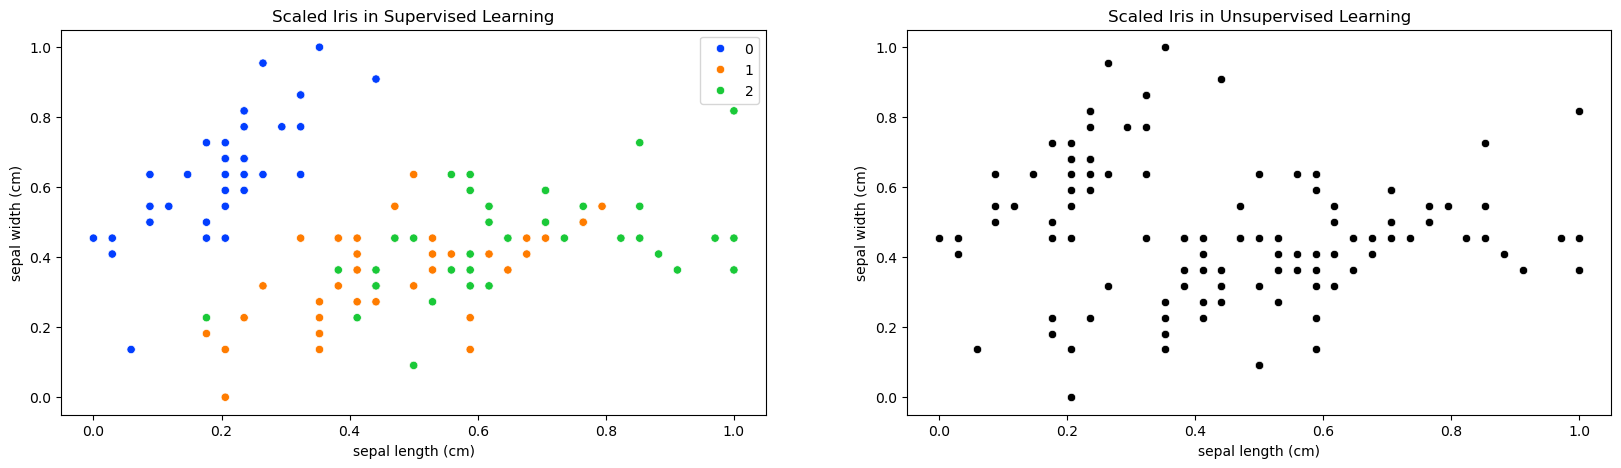

In [14]:
# Iris in Supervised and Unsupervised Learning
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Scaled Iris in Supervised Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=y_train, palette='bright' )
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.subplot(1,2,2)
# Iris in Unsupervised Learning
plt.title('Scaled Iris in Unsupervised Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], color='black')
plt.xlabel(f_names[0])
plt.ylabel(f_names[1]);

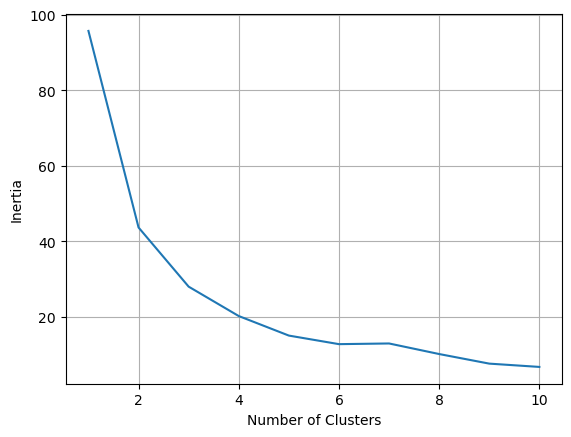

In [16]:
from sklearn.cluster import KMeans
# inertia graph
l_inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init='auto')
    kmeans.fit(X_train[:,:2])
    l_inertia.append(kmeans.inertia_)
plt.plot( range(1,11), l_inertia )
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid();

In [18]:
# build the clustering model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X_train_scaled[:,:2])

KMeans(n_clusters=3, n_init='auto')

In [19]:
kmeans.labels_[:5]

array([1, 1, 2, 0, 0], dtype=int32)

In [20]:
kmeans.cluster_centers_.shape

(3, 2)

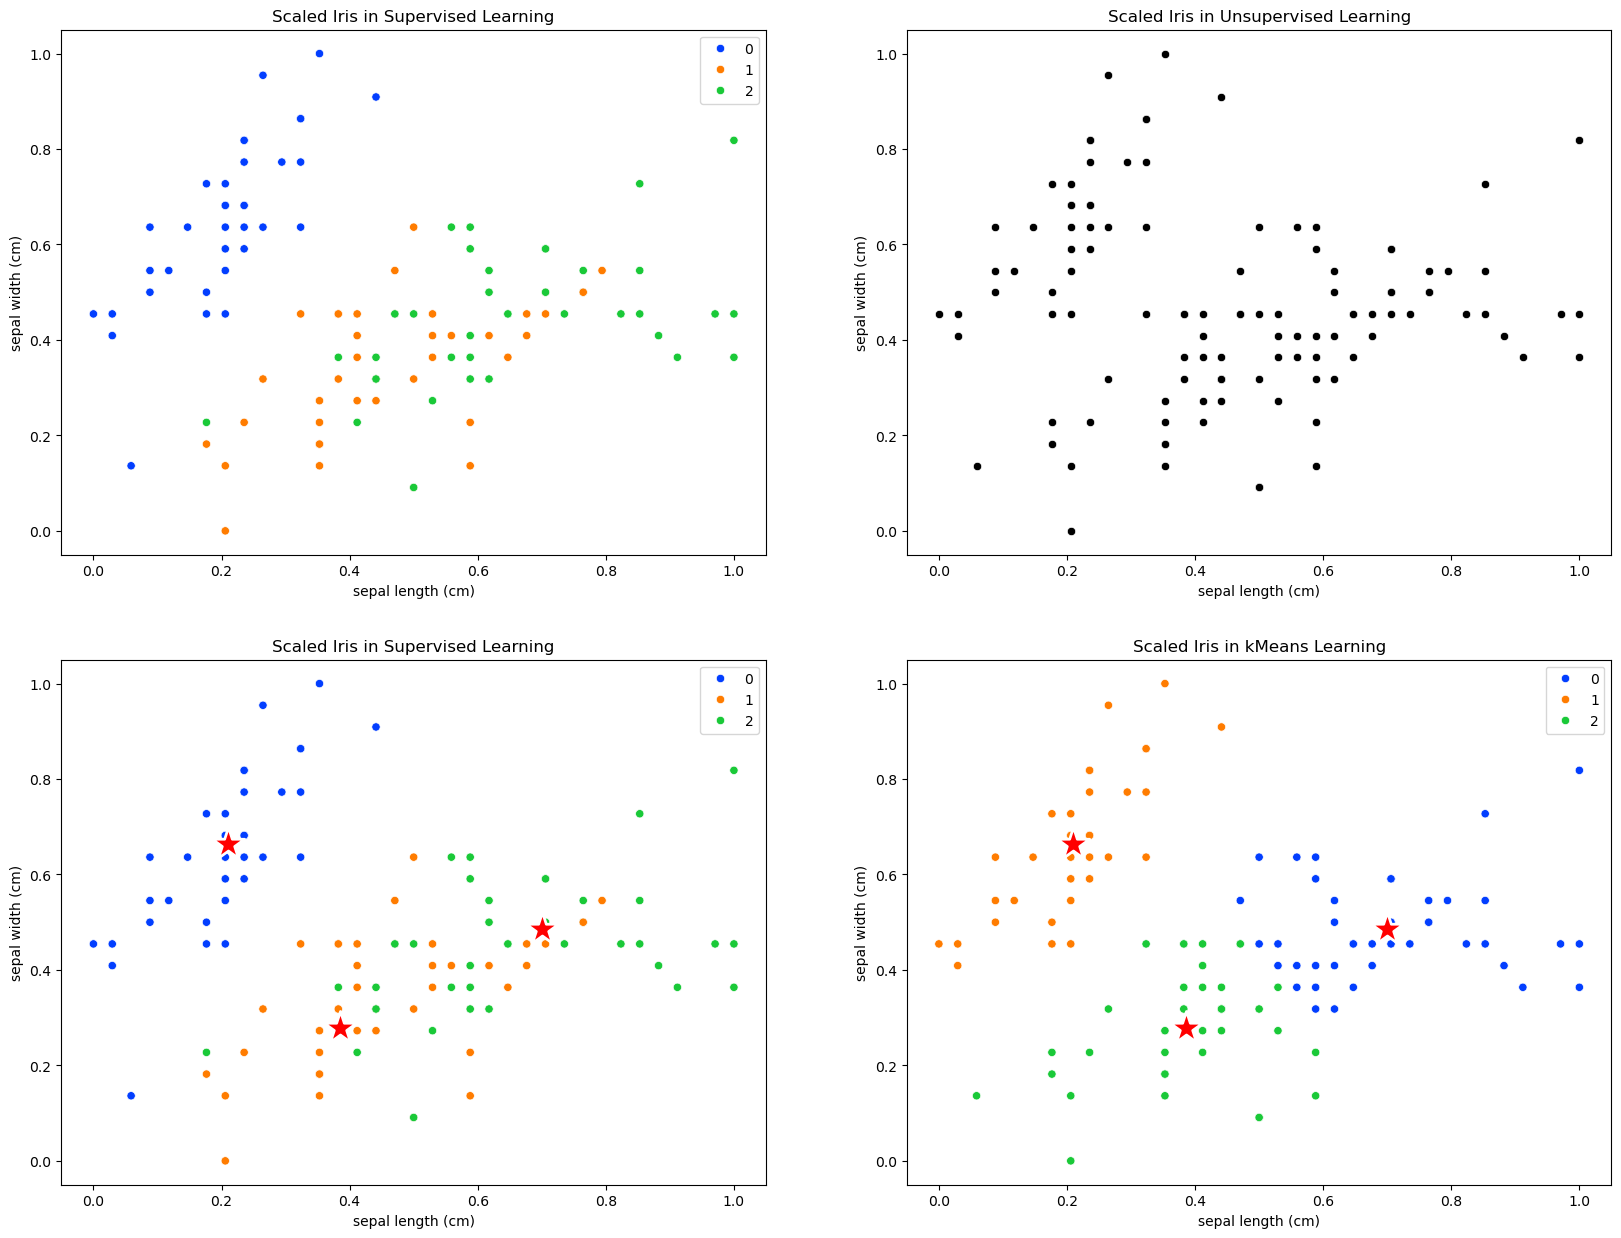

In [23]:
# Iris in Supervised and Unsupervised Learning
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Scaled Iris in Supervised Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=y_train, palette='bright' )
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.subplot(2,2,2)
# Iris in Unsupervised Learning
plt.title('Scaled Iris in Unsupervised Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], color='black')
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.subplot(2,2,3)
# Iris in kMeans Learning
plt.title('Scaled Iris in Supervised Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=y_train, palette='bright' )
sns.scatterplot( x = kmeans.cluster_centers_[:,0], y  = kmeans.cluster_centers_[:,1], color = 'r', marker = '*', s=600 );
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.subplot(2,2,4)
# Iris in kMeans Learning
plt.title('Scaled Iris in kMeans Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=kmeans.labels_ ,palette='bright')
sns.scatterplot( x = kmeans.cluster_centers_[:,0], y  = kmeans.cluster_centers_[:,1], color = 'r', marker = '*', s=600 );
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.tight_layout;

In [24]:
# y_train
y_train[:10]

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2])

In [25]:
# labels
kmeans.labels_[:10]

array([1, 1, 2, 0, 0, 1, 1, 2, 0, 0], dtype=int32)

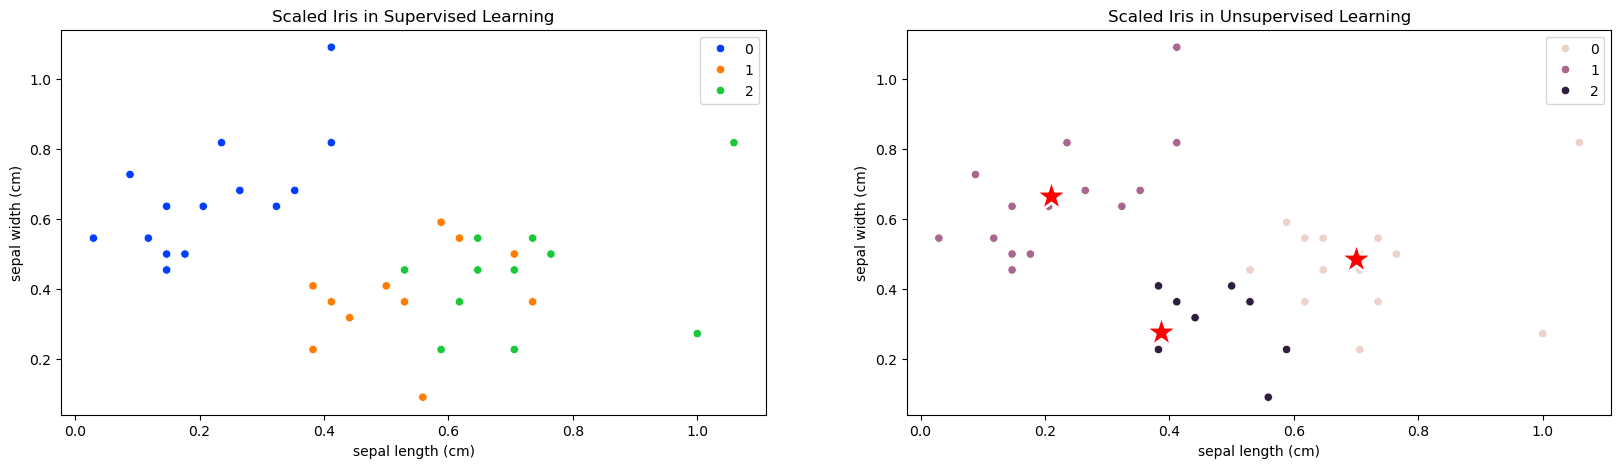

In [26]:
# Test Set
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Scaled Iris in Supervised Learning')
sns.scatterplot( x=X_test_scaled[:,0], y=X_test_scaled[:,1], hue=y_test, palette='bright' )
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.subplot(1,2,2)
# Iris in Unsupervised Learning
plt.title('Scaled Iris in Unsupervised Learning')
sns.scatterplot( x=X_test_scaled[:,0], y=X_test_scaled[:,1], hue=kmeans.predict(X_test_scaled[:,:2]), color='black')
sns.scatterplot( x = kmeans.cluster_centers_[:,0], y  = kmeans.cluster_centers_[:,1], color = 'r', marker = '*', s=600 );
plt.xlabel(f_names[0])
plt.ylabel(f_names[1]);

## Cancer Dataset

In [28]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
f_names = load_breast_cancer().feature_names

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# scale the iris data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

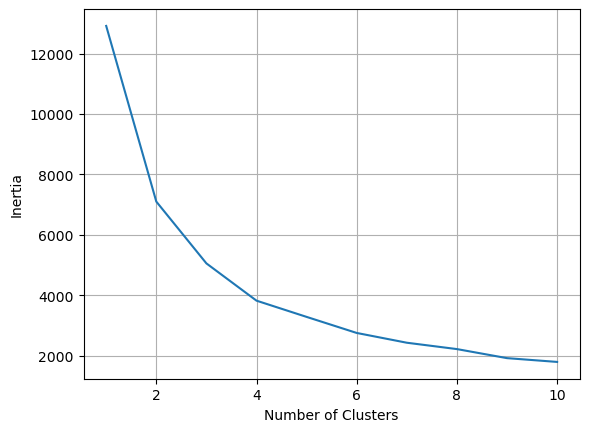

In [33]:
# inertia graph
l_inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init='auto')
    kmeans.fit(X_train[:,:2])
    l_inertia.append(kmeans.inertia_)
plt.plot( range(1,11), l_inertia )
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid();

In [34]:
# n_clusters=2
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X_train_scaled[:,:2])

KMeans(n_clusters=2, n_init='auto')

In [35]:
kmeans.labels_[:5]

array([0, 0, 0, 1, 1], dtype=int32)

In [36]:
kmeans.cluster_centers_.shape

(2, 2)

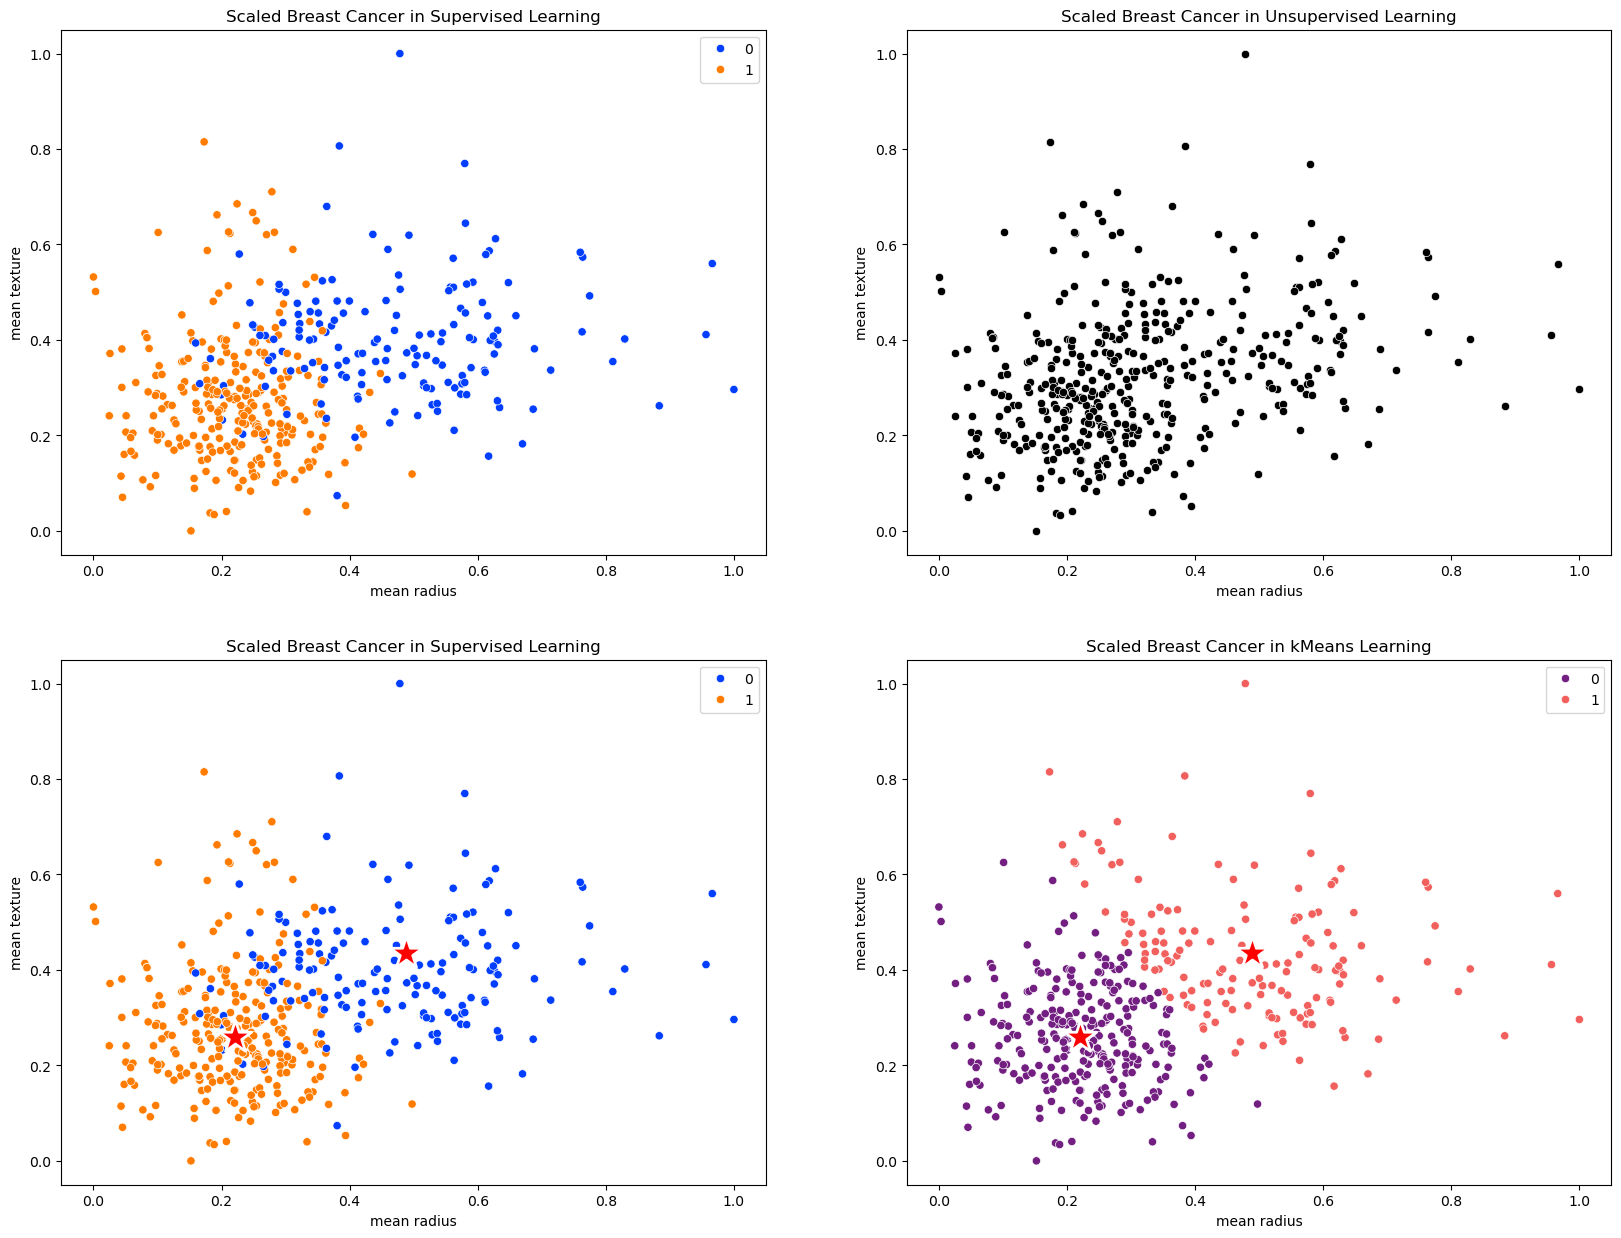

In [37]:
# Breast Cancer Data in Supervised and Unsupervised Learning
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Scaled Breast Cancer in Supervised Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=y_train, palette='bright' )
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.subplot(2,2,2)
# bc in Unsupervised Learning
plt.title('Scaled Breast Cancer in Unsupervised Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], color='black')
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.subplot(2,2,3)
# bc in kMeans Learning
plt.title('Scaled Breast Cancer in Supervised Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=y_train, palette='bright' )
sns.scatterplot( x = kmeans.cluster_centers_[:,0], y  = kmeans.cluster_centers_[:,1], color = 'r', marker = '*', s=600 );
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.subplot(2,2,4)
# bc in kMeans Learning
plt.title('Scaled Breast Cancer in kMeans Learning')
sns.scatterplot( x=X_train_scaled[:,0], y=X_train_scaled[:,1], hue=kmeans.labels_ ,palette='magma')
sns.scatterplot( x = kmeans.cluster_centers_[:,0], y  = kmeans.cluster_centers_[:,1], color = 'r', marker = '*', s=600 );
plt.xlabel(f_names[0])
plt.ylabel(f_names[1])
plt.tight_layout;

In [39]:
# first 10 y_train
y_train[:10]

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [40]:
# first 10 labels
kmeans.labels_[:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

In [43]:
# success ratio
1-sum(y_train == kmeans.labels_)/len(X_train_scaled)

0.8826291079812206

In [45]:
# kMeans with whole features
kmeans.fit(X_train_scaled)
sum(y_train == kmeans.labels_)/len(X_train_scaled)

0.9154929577464789

In [46]:
# kMeans with whole features on test data
sum(y_test == kmeans.predict(X_test_scaled))/len(X_test_scaled)

0.9440559440559441